In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('data_dis.csv')  

if data['Attrition'].dtype == 'object':
    data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# target variable and features
target = data['Attrition']
features = data.drop('Attrition', axis=1)  

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.8775510204081632
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
 [[254   1]
 [ 35   4]]


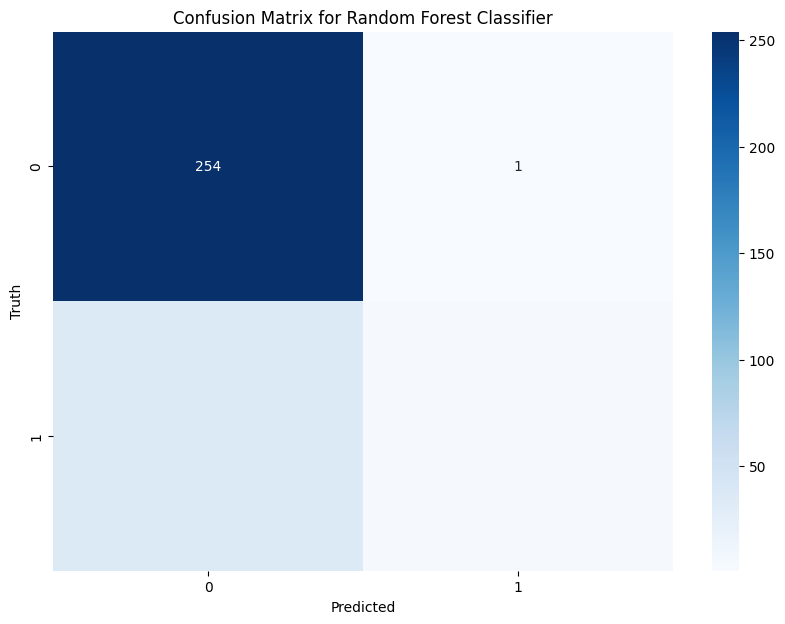

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
# Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [23]:
import pandas as pd

df = pd.read_csv('data_dis.csv')  

df = df.drop_duplicates()


#Drop rows with any missing values
df = df.dropna()

# Save the cleaned dataframe back to a CSV file
df.to_csv('cleaned_data.csv', index=False)

print("Data cleaning complete and saved to cleaned_data.csv")


Data cleaning complete and saved to cleaned_data.csv
